In [89]:
import IPython.display as ipd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
import sklearn.utils, sklearn.preprocessing, sklearn.decomposition
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from time import time
import pydotplus
from sklearn import tree
from IPython.display import Image
import scikitplot as skplt
from sklearn.neural_network import MLPClassifier

In [90]:
df = pd.read_csv("/home/damessina/Desktop/df_pulito.csv")

In [91]:
df.drop(columns=['Unnamed: 0'], inplace= True)

In [92]:
df_split1 = df[df['split']=='training']
df_split2 = df[df['split']=='validation']
con = [df_split1, df_split2]
df_train = pd.concat(con, ignore_index=True)
df_train.drop(columns=['split'], inplace=True)
df_train.reset_index(drop=True, inplace=True)

In [93]:
attributes_tr = [col for col in df_train.columns if col != 'artist_wikipedia_page']
X_train = df_train[attributes_tr].values
y_train = df_train['artist_wikipedia_page']

In [94]:
df_test = df[df['split']=='test']
df_test.drop(columns=['split'], inplace=True)
df_test.reset_index(drop=True, inplace=True)

/home/damessina/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [95]:
attributes_te = [col for col in df_test.columns if col != 'artist_wikipedia_page']
X_test = df_test[attributes_te].values
y_test = df_test['artist_wikipedia_page']

In [96]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Modello di base del multi layer perceptron Classifier

In [23]:
clf = MLPClassifier(random_state=0)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9222697240575204
F1-score [0.95869475 0.34210526]
              precision    recall  f1-score   support

          No       0.96      0.96      0.96      2418
         Yes       0.35      0.34      0.34       155

    accuracy                           0.92      2573
   macro avg       0.65      0.65      0.65      2573
weighted avg       0.92      0.92      0.92      2573



/home/damessina/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [25]:
clf = MLPClassifier(max_iter= 300)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9094442285270112
F1-score [0.95144822 0.32853026]
              precision    recall  f1-score   support

          No       0.96      0.94      0.95      2418
         Yes       0.30      0.37      0.33       155

    accuracy                           0.91      2573
   macro avg       0.63      0.66      0.64      2573
weighted avg       0.92      0.91      0.91      2573



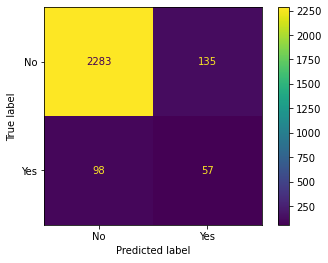

In [26]:
predict = clf.predict(X_test)
cm = confusion_matrix(y_test, predict, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

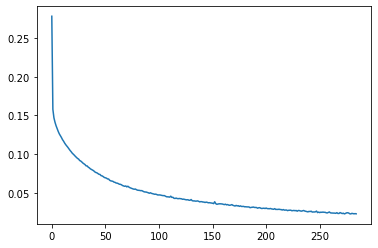

In [27]:
plt.plot(clf.loss_curve_)
plt.show()

## Tento di cambiare la funione di attivazione

In [29]:
clf = MLPClassifier(activation='identity')

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9347065682083171
F1-score [0.96622437 0.02325581]
              precision    recall  f1-score   support

          No       0.94      0.99      0.97      2418
         Yes       0.12      0.01      0.02       155

    accuracy                           0.93      2573
   macro avg       0.53      0.50      0.49      2573
weighted avg       0.89      0.93      0.91      2573



In [63]:
clf = MLPClassifier(activation='logistic', max_iter= 600)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9176059075009716
F1-score [0.95639654 0.25352113]
              precision    recall  f1-score   support

          No       0.95      0.96      0.96      2418
         Yes       0.28      0.23      0.25       155

    accuracy                           0.92      2573
   macro avg       0.62      0.60      0.60      2573
weighted avg       0.91      0.92      0.91      2573



training set score and loss: 0.997, 0.013514


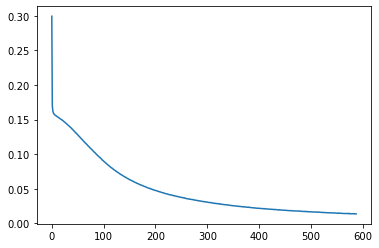

In [64]:
print("training set score and loss: %.3f, %f" % (clf.score(X_train, y_train), clf.loss_))
plt.plot(clf.loss_curve_)
plt.show()

## Questo è il modello che ha sicuramente le prestazioni migliori, ma ripetendo l'esperimento non mi ha più dato gli stessi risultati

In [65]:
clf = MLPClassifier(activation='tanh', max_iter=400)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9323746599300428
F1-score [0.96378018 0.49122807]
              precision    recall  f1-score   support

          No       0.97      0.96      0.96      2418
         Yes       0.45      0.54      0.49       155

    accuracy                           0.93      2573
   macro avg       0.71      0.75      0.73      2573
weighted avg       0.94      0.93      0.94      2573



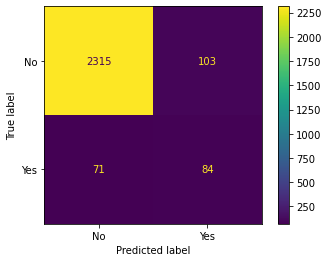

In [66]:
predict = clf.predict(X_test)
cm = confusion_matrix(y_test, predict, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

training set score and loss: 0.998, 0.009191


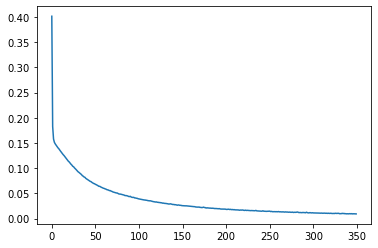

In [67]:
print("training set score and loss: %.3f, %f" % (clf.score(X_train, y_train), clf.loss_))
plt.plot(clf.loss_curve_)
plt.show()

In [40]:
import warnings
from sklearn.exceptions import ConvergenceWarning

## Analizzo i risultati di varie combinazioni di parametri

In [73]:
params = [{'solver': 'sgd', 'learning_rate': 'constant', 'momentum': 0,
           'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'constant', 'momentum': .9,
           'nesterovs_momentum': False, 'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'constant', 'momentum': .9,
           'nesterovs_momentum': True, 'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': 0,
           'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': .9,
           'nesterovs_momentum': True, 'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': .9,
           'nesterovs_momentum': False, 'learning_rate_init': 0.2},
          {'solver': 'adam', 'learning_rate_init': 0.01}]

labels = ["constant learning-rate", "constant with momentum",
          "constant with Nesterov's momentum",
          "inv-scaling learning-rate", "inv-scaling with momentum",
          "inv-scaling with Nesterov's momentum", "adam"]

plot_args = [{'c': 'red', 'linestyle': '-'},
             {'c': 'green', 'linestyle': '-'},
             {'c': 'blue', 'linestyle': '-'},
             {'c': 'red', 'linestyle': '--'},
             {'c': 'green', 'linestyle': '--'},
             {'c': 'blue', 'linestyle': '--'},
             {'c': 'black', 'linestyle': '-'}]

In [77]:
for label, param in zip(labels, params):
    print(label)
    clf = MLPClassifier(random_state=0, max_iter=600, **param)

    # some parameter combinations will not converge as can be seen on the
    # plots so they are ignored here
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
        clf.fit(X_train, y_train)

    print("training set score and loss: %.3f, %f" % (clf.score(X_train, y_train), clf.loss_))
    plt.plot(clf.loss_curve_, label=label)
    plt.legend(loc="upper center")
    plt.show()

constant learning-rate
training set score and loss: 1.000, 0.000796
constant with momentum
training set score and loss: 1.000, 0.000796
constant with Nesterov's momentum
training set score and loss: 1.000, 0.000796
inv-scaling learning-rate
training set score and loss: 1.000, 0.000796
inv-scaling with momentum
training set score and loss: 1.000, 0.000796
inv-scaling with Nesterov's momentum
training set score and loss: 1.000, 0.000796
adam
training set score and loss: 0.993, 0.026856


In [75]:
params = [{'solver': 'lbfgs', 'learning_rate': 'constant', 'momentum': 0,
           'learning_rate_init': 0.2},
          {'solver': 'lbfgs', 'learning_rate': 'constant', 'momentum': .9,
           'nesterovs_momentum': False, 'learning_rate_init': 0.2},
          {'solver': 'lbfgs', 'learning_rate': 'constant', 'momentum': .9,
           'nesterovs_momentum': True, 'learning_rate_init': 0.2},
          {'solver': 'lbfgs', 'learning_rate': 'invscaling', 'momentum': 0,
           'learning_rate_init': 0.2},
          {'solver': 'lbfgs', 'learning_rate': 'invscaling', 'momentum': .9,
           'nesterovs_momentum': True, 'learning_rate_init': 0.2},
          {'solver': 'lbfgs', 'learning_rate': 'invscaling', 'momentum': .9,
           'nesterovs_momentum': False, 'learning_rate_init': 0.2},
          {'solver': 'adam', 'learning_rate_init': 0.01}]

labels = ["constant learning-rate", "constant with momentum",
          "constant with Nesterov's momentum",
          "inv-scaling learning-rate", "inv-scaling with momentum",
          "inv-scaling with Nesterov's momentum", "adam"]

plot_args = [{'c': 'red', 'linestyle': '-'},
             {'c': 'green', 'linestyle': '-'},
             {'c': 'blue', 'linestyle': '-'},
             {'c': 'red', 'linestyle': '--'},
             {'c': 'green', 'linestyle': '--'},
             {'c': 'blue', 'linestyle': '--'},
             {'c': 'black', 'linestyle': '-'}]


In [78]:
for label, param in zip(labels, params):
    print(label)
    clf = MLPClassifier(random_state=0, max_iter=600, **param)

    # some parameter combinations will not converge as can be seen on the
    # plots so they are ignored here
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
        clf.fit(X_train, y_train)

    print("training set score and loss: %.3f, %f" % (clf.score(X_train, y_train), clf.loss_))
    #plt.plot(clf.loss_curve_, label=label)
    #plt.legend(loc="upper center")
    #plt.show()

constant learning-rate
training set score and loss: 1.000, 0.000796
constant with momentum
training set score and loss: 1.000, 0.000796
constant with Nesterov's momentum
training set score and loss: 1.000, 0.000796
inv-scaling learning-rate
training set score and loss: 1.000, 0.000796
inv-scaling with momentum
training set score and loss: 1.000, 0.000796
inv-scaling with Nesterov's momentum
training set score and loss: 1.000, 0.000796
adam
training set score and loss: 0.993, 0.026856


In [83]:
clf = MLPClassifier(max_iter=600, solver = 'sgd', learning_rate = 'constant', momentum = 0,
                   learning_rate_init= 0.2)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9195491643995336
F1-score [0.95766005 0.19455253]
              precision    recall  f1-score   support

          No       0.95      0.97      0.96      2418
         Yes       0.25      0.16      0.19       155

    accuracy                           0.92      2573
   macro avg       0.60      0.56      0.58      2573
weighted avg       0.91      0.92      0.91      2573



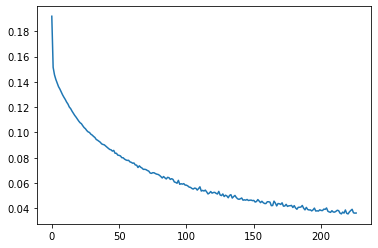

In [84]:
plt.plot(clf.loss_curve_, label=label)

In [97]:
clf = MLPClassifier(activation='tanh', max_iter=400)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9304314030314808
F1-score [0.96310039 0.39322034]
              precision    recall  f1-score   support

          No       0.96      0.97      0.96      2418
         Yes       0.41      0.37      0.39       155

    accuracy                           0.93      2573
   macro avg       0.69      0.67      0.68      2573
weighted avg       0.93      0.93      0.93      2573



In [98]:
clf = MLPClassifier(activation='tanh', max_iter=400, solver='lbfgs')

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9288767975126312
F1-score [0.96210396 0.42271293]
              precision    recall  f1-score   support

          No       0.96      0.96      0.96      2418
         Yes       0.41      0.43      0.42       155

    accuracy                           0.93      2573
   macro avg       0.69      0.70      0.69      2573
weighted avg       0.93      0.93      0.93      2573



In [100]:
print("training set score and loss: %.3f, %f" % (clf.score(X_train, y_train), clf.loss_))
#plt.plot(clf.loss_curve_)
#plt.show()

training set score and loss: 1.000, 0.000466


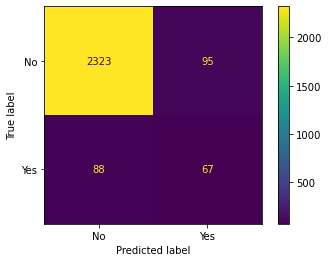

In [101]:
predict = clf.predict(X_test)
cm = confusion_matrix(y_test, predict, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

In [102]:
clf = MLPClassifier(activation='tanh', max_iter=400, solver='sgd')

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9343179168286048
F1-score [0.96600282 0.03428571]
              precision    recall  f1-score   support

          No       0.94      0.99      0.97      2418
         Yes       0.15      0.02      0.03       155

    accuracy                           0.93      2573
   macro avg       0.55      0.51      0.50      2573
weighted avg       0.89      0.93      0.91      2573



In [103]:
clf = MLPClassifier(activation='identity', max_iter=400, solver='lbfgs')

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9358725223474543
F1-score [0.9668475  0.02366864]
              precision    recall  f1-score   support

          No       0.94      1.00      0.97      2418
         Yes       0.14      0.01      0.02       155

    accuracy                           0.94      2573
   macro avg       0.54      0.50      0.50      2573
weighted avg       0.89      0.94      0.91      2573



In [104]:
clf = MLPClassifier(activation='identity', max_iter=400, solver='sgd')

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9350952195880295
F1-score [0.96645913 0.        ]
              precision    recall  f1-score   support

          No       0.94      1.00      0.97      2418
         Yes       0.00      0.00      0.00       155

    accuracy                           0.94      2573
   macro avg       0.47      0.50      0.48      2573
weighted avg       0.88      0.94      0.91      2573



In [105]:
clf = MLPClassifier(activation='logistic', max_iter=400, solver='lbfgs')

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9020598523124758
F1-score [0.94795539 0.17105263]
              precision    recall  f1-score   support

          No       0.95      0.95      0.95      2418
         Yes       0.17      0.17      0.17       155

    accuracy                           0.90      2573
   macro avg       0.56      0.56      0.56      2573
weighted avg       0.90      0.90      0.90      2573



In [106]:
clf = MLPClassifier(activation='logistic', max_iter=400, solver='sgd')

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9385930820054411
F1-score [0.96832398 0.        ]
              precision    recall  f1-score   support

          No       0.94      1.00      0.97      2418
         Yes       0.00      0.00      0.00       155

    accuracy                           0.94      2573
   macro avg       0.47      0.50      0.48      2573
weighted avg       0.88      0.94      0.91      2573



In [108]:
clf = MLPClassifier(activation='relu', max_iter=600, solver='lbfgs')

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9032258064516129
F1-score [0.94839378 0.22429907]
              precision    recall  f1-score   support

          No       0.95      0.95      0.95      2418
         Yes       0.22      0.23      0.22       155

    accuracy                           0.90      2573
   macro avg       0.58      0.59      0.59      2573
weighted avg       0.91      0.90      0.90      2573



/home/damessina/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [109]:
clf = MLPClassifier(activation='relu', max_iter=400, solver='sgd')

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9300427516517684
F1-score [0.96359223 0.10891089]
              precision    recall  f1-score   support

          No       0.94      0.99      0.96      2418
         Yes       0.23      0.07      0.11       155

    accuracy                           0.93      2573
   macro avg       0.59      0.53      0.54      2573
weighted avg       0.90      0.93      0.91      2573



In [110]:
clf = MLPClassifier(hidden_layer_sizes=(40,40,40), activation='tanh', max_iter=400)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9246016323357948
F1-score [0.96013152 0.30714286]
              precision    recall  f1-score   support

          No       0.95      0.97      0.96      2418
         Yes       0.34      0.28      0.31       155

    accuracy                           0.92      2573
   macro avg       0.65      0.62      0.63      2573
weighted avg       0.92      0.92      0.92      2573



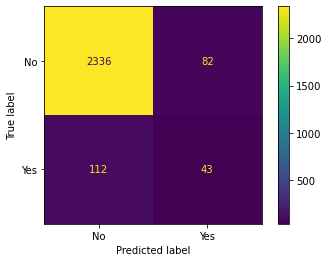

In [111]:
predict = clf.predict(X_test)
cm = confusion_matrix(y_test, predict, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

In [112]:
clf = MLPClassifier(hidden_layer_sizes=(100,50,30), activation='tanh', max_iter=400)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9028371550719005
F1-score [0.94864421 0.10071942]
              precision    recall  f1-score   support

          No       0.94      0.95      0.95      2418
         Yes       0.11      0.09      0.10       155

    accuracy                           0.90      2573
   macro avg       0.53      0.52      0.52      2573
weighted avg       0.89      0.90      0.90      2573



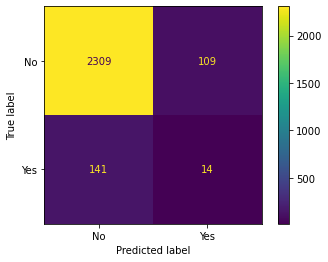

In [113]:
predict = clf.predict(X_test)
cm = confusion_matrix(y_test, predict, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

In [114]:
clf = MLPClassifier(hidden_layer_sizes=(30,50,100), activation='tanh', max_iter=400)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9269335406140692
F1-score [0.96128501 0.35172414]
              precision    recall  f1-score   support

          No       0.96      0.97      0.96      2418
         Yes       0.38      0.33      0.35       155

    accuracy                           0.93      2573
   macro avg       0.67      0.65      0.66      2573
weighted avg       0.92      0.93      0.92      2573



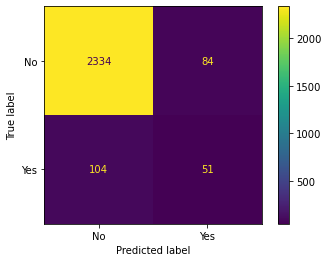

In [115]:
predict = clf.predict(X_test)
cm = confusion_matrix(y_test, predict, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

In [116]:
clf = MLPClassifier(hidden_layer_sizes=(50,50,50), activation='tanh', max_iter=400)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.8880684026428294
F1-score [0.94007491 0.15294118]
              precision    recall  f1-score   support

          No       0.95      0.93      0.94      2418
         Yes       0.14      0.17      0.15       155

    accuracy                           0.89      2573
   macro avg       0.54      0.55      0.55      2573
weighted avg       0.90      0.89      0.89      2573



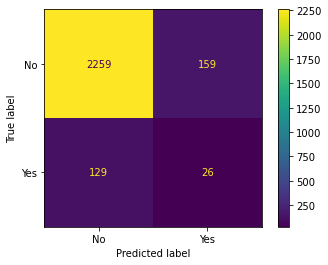

In [117]:
predict = clf.predict(X_test)
cm = confusion_matrix(y_test, predict, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

In [118]:
clf = MLPClassifier(hidden_layer_sizes=(200,), activation='tanh', max_iter=400)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9253789350952196
F1-score [0.96009975 0.4251497 ]
              precision    recall  f1-score   support

          No       0.96      0.96      0.96      2418
         Yes       0.40      0.46      0.43       155

    accuracy                           0.93      2573
   macro avg       0.68      0.71      0.69      2573
weighted avg       0.93      0.93      0.93      2573



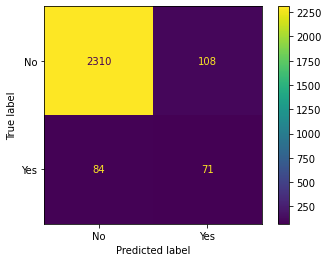

In [119]:
predict = clf.predict(X_test)
cm = confusion_matrix(y_test, predict, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

In [120]:
clf = MLPClassifier(hidden_layer_sizes=(200,), activation='tanh', max_iter=400, solver='lbfgs')

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.919937815779246
F1-score [0.95766543 0.26428571]
              precision    recall  f1-score   support

          No       0.95      0.96      0.96      2418
         Yes       0.30      0.24      0.26       155

    accuracy                           0.92      2573
   macro avg       0.62      0.60      0.61      2573
weighted avg       0.91      0.92      0.92      2573



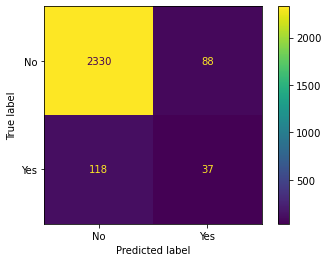

In [121]:
predict = clf.predict(X_test)
cm = confusion_matrix(y_test, predict, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

In [122]:
clf = MLPClassifier(hidden_layer_sizes=(50,50,50), activation='tanh', max_iter=400, solver='lbfgs')

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.919937815779246
F1-score [0.95736755 0.34394904]
              precision    recall  f1-score   support

          No       0.96      0.96      0.96      2418
         Yes       0.34      0.35      0.34       155

    accuracy                           0.92      2573
   macro avg       0.65      0.65      0.65      2573
weighted avg       0.92      0.92      0.92      2573



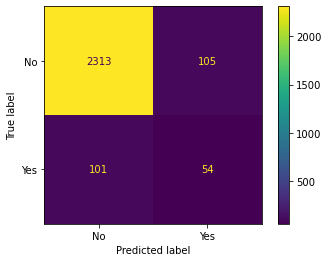

In [123]:
predict = clf.predict(X_test)
cm = confusion_matrix(y_test, predict, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

In [124]:
clf = MLPClassifier(hidden_layer_sizes=(30,50,100), activation='tanh', max_iter=400, solver='lbfgs')

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9230470268169452
F1-score [0.95917526 0.33108108]
              precision    recall  f1-score   support

          No       0.96      0.96      0.96      2418
         Yes       0.35      0.32      0.33       155

    accuracy                           0.92      2573
   macro avg       0.65      0.64      0.65      2573
weighted avg       0.92      0.92      0.92      2573



/home/damessina/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


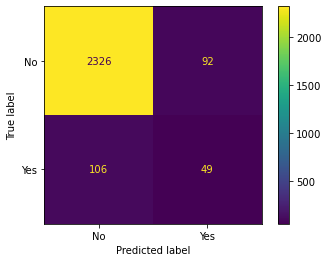

In [125]:
predict = clf.predict(X_test)
cm = confusion_matrix(y_test, predict, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

In [126]:
clf = MLPClassifier(hidden_layer_sizes=(100,50,300), activation='tanh', max_iter=400, solver='lbfgs')

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9063350174893121
F1-score [0.95029903 0.18855219]
              precision    recall  f1-score   support

          No       0.95      0.95      0.95      2418
         Yes       0.20      0.18      0.19       155

    accuracy                           0.91      2573
   macro avg       0.57      0.57      0.57      2573
weighted avg       0.90      0.91      0.90      2573



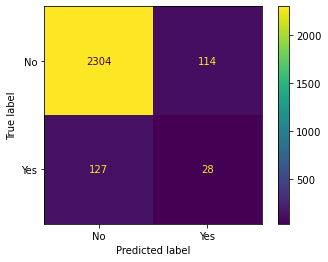

In [127]:
predict = clf.predict(X_test)
cm = confusion_matrix(y_test, predict, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

In [128]:
clf = MLPClassifier(hidden_layer_sizes=(100,100,100), activation='tanh', max_iter=400, solver='lbfgs')

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.916051301982122
F1-score [0.95566502 0.21167883]
              precision    recall  f1-score   support

          No       0.95      0.96      0.96      2418
         Yes       0.24      0.19      0.21       155

    accuracy                           0.92      2573
   macro avg       0.60      0.57      0.58      2573
weighted avg       0.91      0.92      0.91      2573



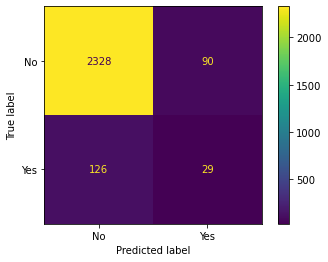

In [129]:
predict = clf.predict(X_test)
cm = confusion_matrix(y_test, predict, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

In [131]:
clf = MLPClassifier(hidden_layer_sizes=(300,), activation='tanh', max_iter=400)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9176059075009716
F1-score [0.9563786  0.25874126]
              precision    recall  f1-score   support

          No       0.95      0.96      0.96      2418
         Yes       0.28      0.24      0.26       155

    accuracy                           0.92      2573
   macro avg       0.62      0.60      0.61      2573
weighted avg       0.91      0.92      0.91      2573



In [132]:
clf = MLPClassifier(hidden_layer_sizes=(200,), activation='tanh', max_iter=400)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9148853478429848
F1-score [0.95481741 0.26755853]
              precision    recall  f1-score   support

          No       0.95      0.96      0.95      2418
         Yes       0.28      0.26      0.27       155

    accuracy                           0.91      2573
   macro avg       0.62      0.61      0.61      2573
weighted avg       0.91      0.91      0.91      2573



In [150]:
clf = MLPClassifier(hidden_layer_sizes=(200,), activation='tanh', max_iter=500, solver='lbfgs')

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9195491643995336
F1-score [0.9569736  0.38208955]
              precision    recall  f1-score   support

          No       0.96      0.95      0.96      2418
         Yes       0.36      0.41      0.38       155

    accuracy                           0.92      2573
   macro avg       0.66      0.68      0.67      2573
weighted avg       0.93      0.92      0.92      2573



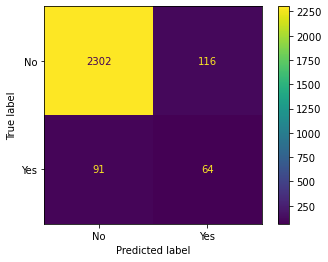

In [151]:
predict = clf.predict(X_test)
cm = confusion_matrix(y_test, predict, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

In [159]:
clf1 = MLPClassifier(hidden_layer_sizes=(300,), activation='tanh', max_iter=500, solver='lbfgs')

clf1.fit(X_train, y_train)

y_pred = clf1.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9203264671589584
F1-score [0.95688749 0.47570332]
              precision    recall  f1-score   support

          No       0.97      0.94      0.96      2418
         Yes       0.39      0.60      0.48       155

    accuracy                           0.92      2573
   macro avg       0.68      0.77      0.72      2573
weighted avg       0.94      0.92      0.93      2573



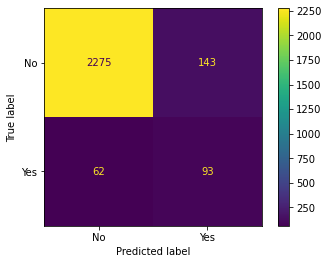

In [161]:
predict = clf1.predict(X_test)
cm = confusion_matrix(y_test, predict, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

Text(0.5, 1.0, 'Cumultive Gain Chart')

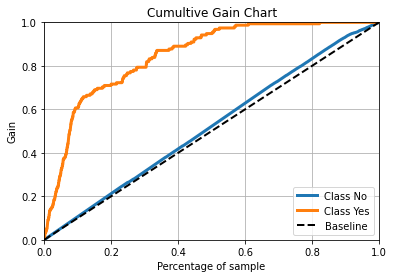

In [162]:
predicted_probabilities = clf1.predict_proba(X_test)
# Creating the plot
skplt.metrics.plot_cumulative_gain(y_test, predicted_probabilities)
plt.title("Cumultive Gain Chart")

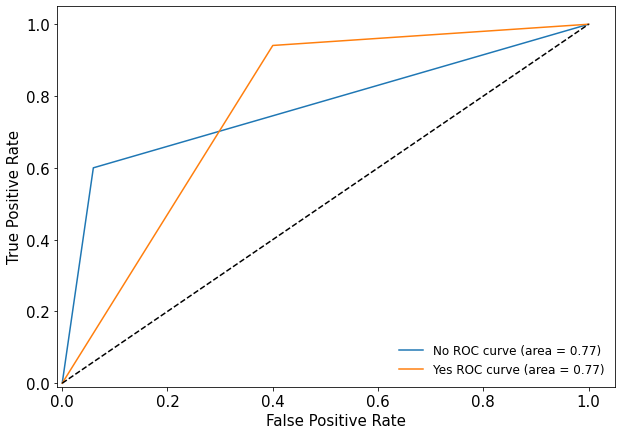

In [163]:
lb = LabelBinarizer()
lb.fit(y_test)
lb.classes_.tolist()

fpr = dict()
tpr = dict()
roc_auc = dict()
by_test_bin= lb.transform(y_test)
by_pred_bin = lb.transform(y_pred)
by_test = np.hstack((by_test_bin, 1 - by_test_bin))
by_pred = np.hstack((by_pred_bin, 1 - by_pred_bin))

for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(by_test[:, i], by_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
roc_auc = roc_auc_score(by_test, by_pred, average=None)
roc_auc
plt.figure(figsize=(10, 7))
for i in range(2):
    plt.plot(fpr[i], tpr[i], 
             label='%s ROC curve (area = %0.2f)' % (lb.classes_.tolist()[i], roc_auc[i]))
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.01, 1.05])
plt.ylim([-0.01, 1.05])
plt.xlabel('False Positive Rate', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15) 
plt.tick_params(axis='both', which='major', labelsize=15)
plt.legend(loc="lower right", fontsize=12, frameon=False)
plt.show()

In [165]:
df_cross = df
# modifico i valori Yes e No con 1 e 0 perché sennò il modello non riesce a fittare
#df_cross.replace({'artist_wikipedia_page' : {'Yes' : 1, 'No' : 0}}, inplace = True)
#df_cross.drop(columns=['split'], inplace = True)
attributes = [col for col in df.columns if col != 'artist_wikipedia_page']
X = df_cross[attributes].values
y = df_cross['artist_wikipedia_page']
X = scaler.fit_transform(X)

scores = cross_val_score(clf1, X, y, cv=6)
print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

scores = cross_val_score(clf1, X, y, cv=6, scoring='f1_macro')
print('F1-score: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

scores = cross_val_score(clf1, X, y, cv=6, scoring='recall_macro')
print('Recall: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

Accuracy: 0.8740 (+/- 0.16)
F1-score: 0.5421 (+/- 0.09)
Recall: 0.5798 (+/- 0.12)
